In [2]:
# Setting up the environment

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [3]:
# Giving access to the data files saved in Google Drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
car_url = '/content/drive/My Drive/Car Analysis/resources/cardata.csv'
car_df = pd.read_csv(car_url)

Setting up HEADERS

In [5]:
headers = ["symboling", "normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

car_df.columns=headers
car_df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


Making a temporary data frame called 'data'.

In [6]:
data = car_df

# Finding the missing values
# data.isna().any()

# Finding if missing values
# data.isnull().any()

print(data.columns)


Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


Converting mpg to L/100km and checking the data type of each column.

In [7]:
# converting mpg to L / 100km
data['city-mpg'] = 235 / car_df['city-mpg']
data.rename(columns = {'city-mpg': "city-L / 100km"}, inplace = True)

print(data.columns)

# checking the data type of each column
data.dtypes


# For second time use
# converting mpg to L / 100km
## data['city-mpg'] = 235 / car_df['city-mpg']
#data.rename(columns = {'city-L / 100km': "city-mpg"}, inplace = True)

#print(data.columns)



Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-L / 100km',
       'highway-mpg', 'price'],
      dtype='object')


,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


Removing null price entry and converting price field to integer data type.

In [13]:
data.price.unique()

# lets drop rows with '?' in price field
data = data[data.price != '?']

data['price'] = data['price'].astype(int)
# data['price'] = data['price'].fillna(0).astype(int)

# checking
data.dtypes


,0
symboling,int64
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64


Normalizing values and binning- grouping values

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
199       Low
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


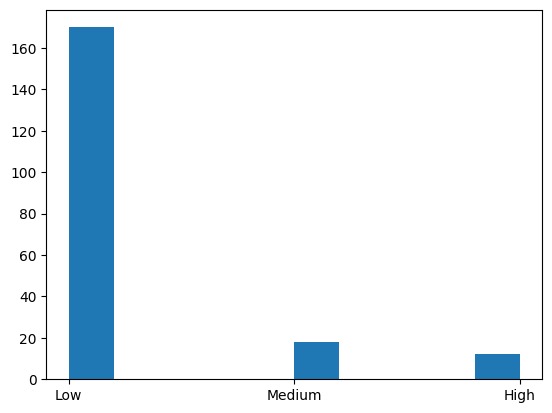

In [14]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# binning values
bins = np.linspace(min(data['price']), max(data['price']), 4)

group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins,
                              labels = group_names,
                              include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()


Analysis of data

In [15]:
# categorical to numerical variables
# pd.get_dummies(data['fuel-type']).head(10)

# descriptive analysis
# NaN are skipped
data.describe()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-L / 100km,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.830000,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,1.248557,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,-2.000000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,1.000000,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,2.000000,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


step 9

{'whiskers': [<matplotlib.lines.Line2D at 0x7e20fc6ae1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e20fc6ae710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e20fc6adf30>],
 'medians': [<matplotlib.lines.Line2D at 0x7e20fc6aec50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e20fc6aeef0>],
 'means': []}

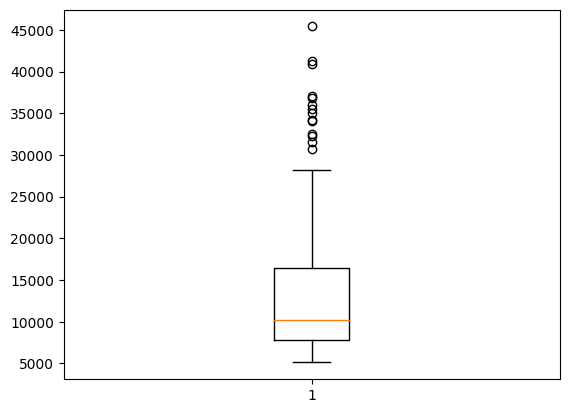

In [17]:
# overview of price of cars
plt.boxplot(data['price'])


<Axes: xlabel='drive-wheels', ylabel='price'>

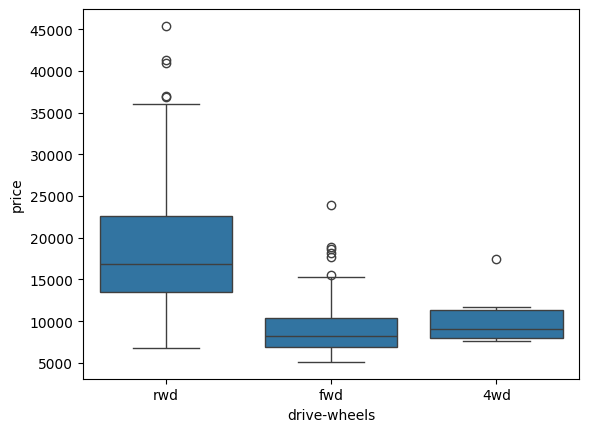

In [18]:
# Price vs. types of drive-wheels of cars
sns.boxplot(x ='drive-wheels', y ='price', data = data)

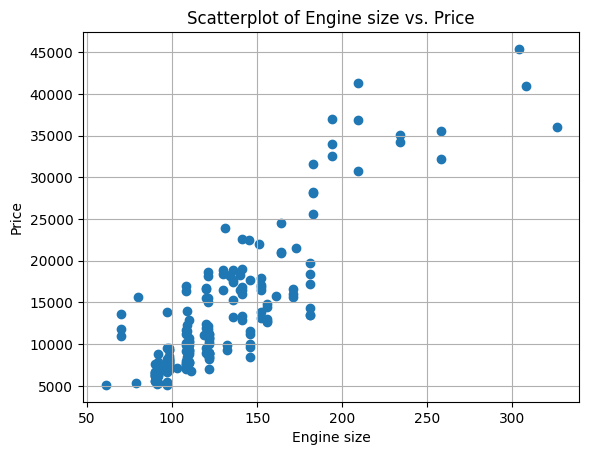

In [19]:
# Predicting price based on engine size
# Known on x and predictable on y
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Engine size vs. Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

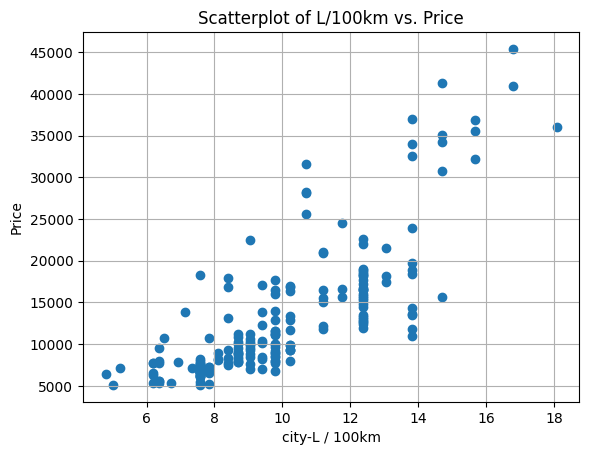

In [20]:
# Predicting price based on L/100km in city
# Known on x and predictable on y
plt.scatter(data['city-L / 100km'], data['price'])
plt.title('Scatterplot of L/100km vs. Price')
plt.xlabel('city-L / 100km')
plt.ylabel('Price')
plt.grid()
plt.show()

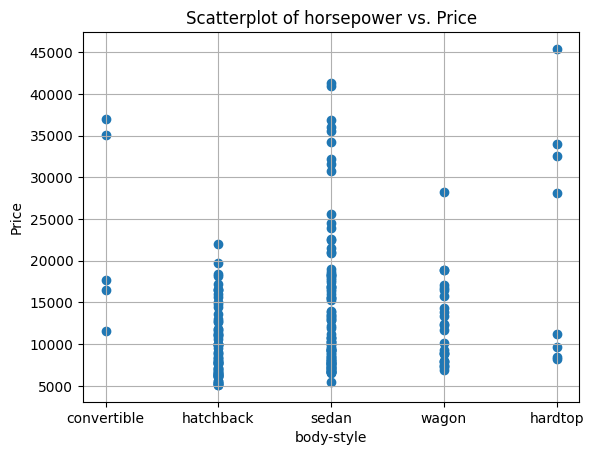

In [21]:
# Predicting price based on body-style
# Known on x and predictable on y
plt.scatter(data['body-style'], data['price'])
plt.title('Scatterplot of horsepower vs. Price')
plt.xlabel('body-style')
plt.ylabel('Price')
plt.grid()
plt.show()

Grouping the data according to wheel, body-style and price.

In [22]:
# Relation of minimum price with the drive-wheels and body-styles
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],as_index = False).min()

data_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603
1,4wd,sedan,9233
2,4wd,wagon,7898
3,fwd,convertible,11595
4,fwd,hardtop,8249
5,fwd,hatchback,5118
6,fwd,sedan,5499
7,fwd,wagon,6918
8,rwd,convertible,16500
9,rwd,hardtop,8449


In [23]:
# Relation of mean price with the drive-wheels and body-styles
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],as_index = False).mean()

data_grp


,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286
